
### Visualización
Para esta ocación trabajaremos con un dataset que es un subconjunto creado por Barry Becker a partir de la base de datos del censo de 1994.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pokemon = pd.read_csv("https://goo.gl/wgwG81", index_col=0)


In [3]:
pokemon.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
pokemon.shape

(800, 12)

- Name: El nombre de cada pokemon
- Type 1: Propiedades para pokemon y sus movimientos (cada tipo tiene sus propias fortalezas y debilidades)
- Tipo 2: Algunos pokemon tienen dos tipos 
- Total: la suma de todas las estadísticas a continuación 
- HP: Puntos de golpe (salud)
- Attack: El modificador base para ataques normales 
- Defense: La estadística para la protección contra ataques normales 
- SP. Atk: El modificador base para ataques especiales 
- SP. Def: La estadística de protección contra ataques especiales 
- Speed: Determina qué Pokémon ataca primero en cada ronda 
- Generation: La generación del pokemon 
- Legendary: si pokemon es legendario o no

In [7]:
pokemon.isnull().values.any()

True

In [9]:
pokemon.isnull().sum().sum()

386

In [10]:
pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [11]:
pokemon["Type 2"].fillna(value='None', inplace=True)

In [12]:
pokemon.isnull().values.any()

False

### Duplicados

In [13]:
pokemon.duplicated().sum()

0

In [16]:
pokemon.drop_duplicates(keep="last")

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [22]:
pokemon["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [23]:
pokemon["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [26]:
for col_name in pokemon.columns:
    unique_val = len(pokemon[col_name].unique())
    print(col_name, unique_val)

Name 800
Type 1 18
Type 2 19
Total 200
HP 94
Attack 111
Defense 103
Sp. Atk 105
Sp. Def 92
Speed 108
Generation 6
Legendary 2


In [28]:
import seaborn as sns
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina')

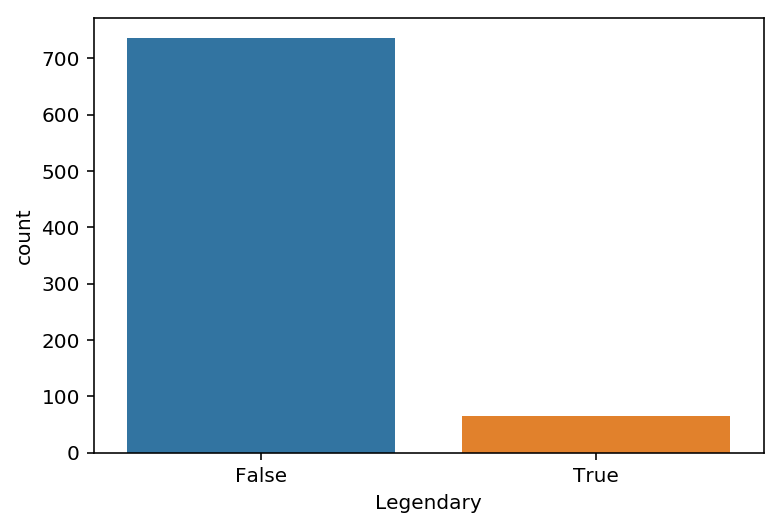

In [29]:
sns.countplot(x="Legendary", data=pokemon)


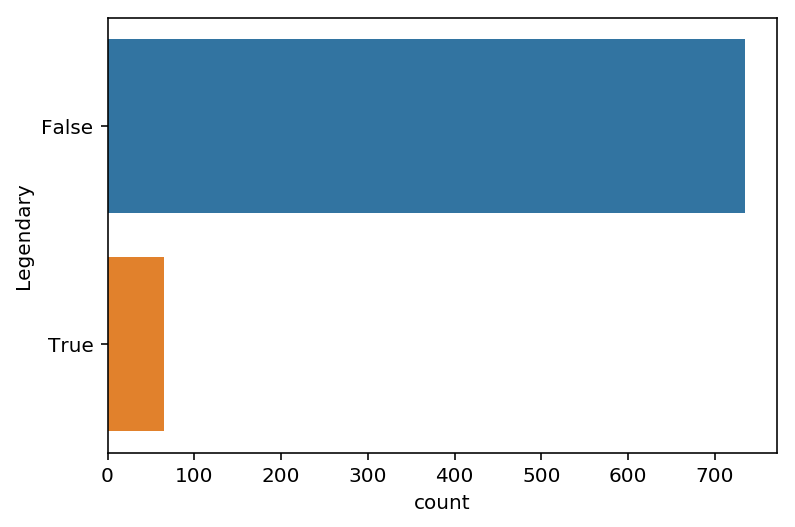

In [35]:
plt.figure(figsize=(6, 4)) 
sns.countplot(y="Legendary", data=pokemon)

Palette Set 1


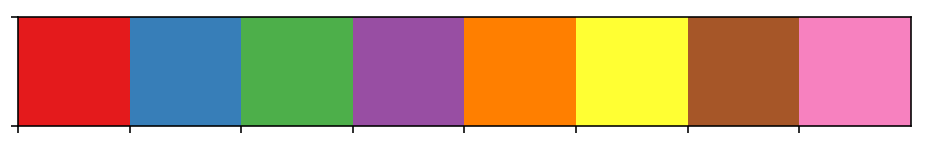

In [32]:
print("Palette Set 1")
sns.palplot(sns.color_palette("Set1", 8))

Palette Set 2


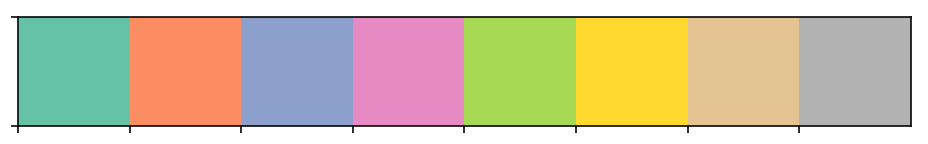

In [37]:
print("Palette Set 2") 
sns.palplot(sns.color_palette("Set2", 8))

Palette BuGn


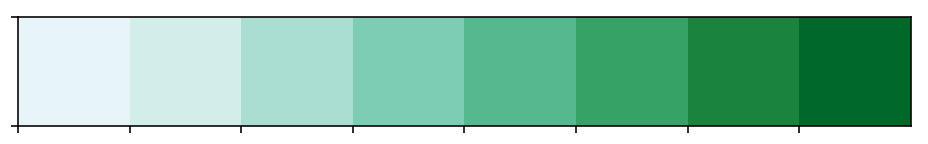

In [38]:
print("Palette BuGn")
sns.palplot(sns.color_palette("BuGn", 8))

Palette RdYlGn


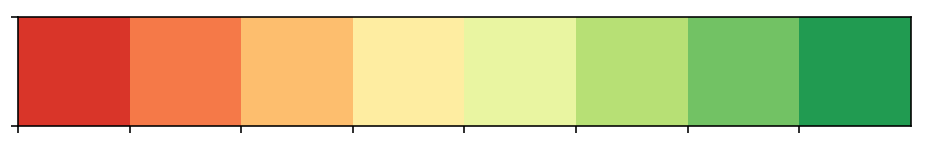

In [43]:
print("Palette RdYlGn")
sns.palplot(sns.color_palette("RdYlGn", 8))

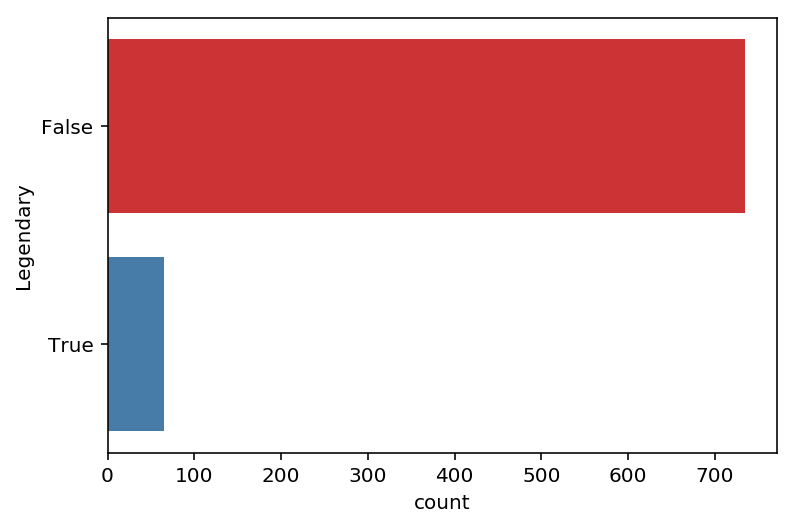

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(y="Legendary", data=pokemon, palette="Set1")

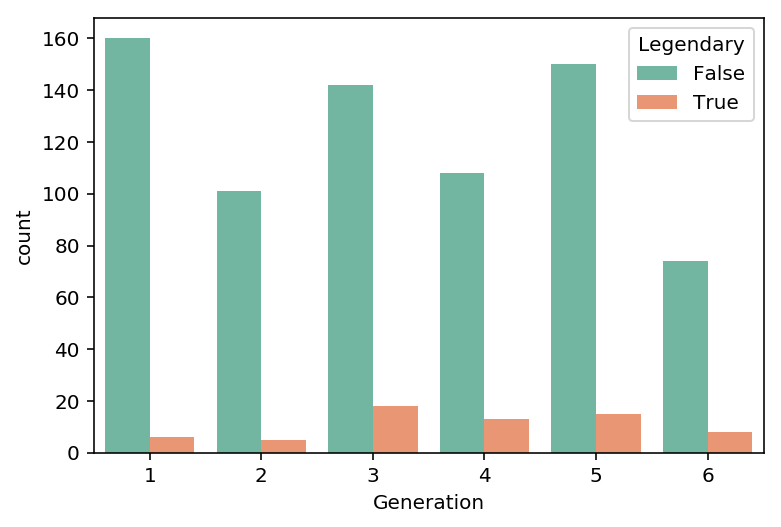

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Generation", data=pokemon, palette="Set2", hue="Legendary")


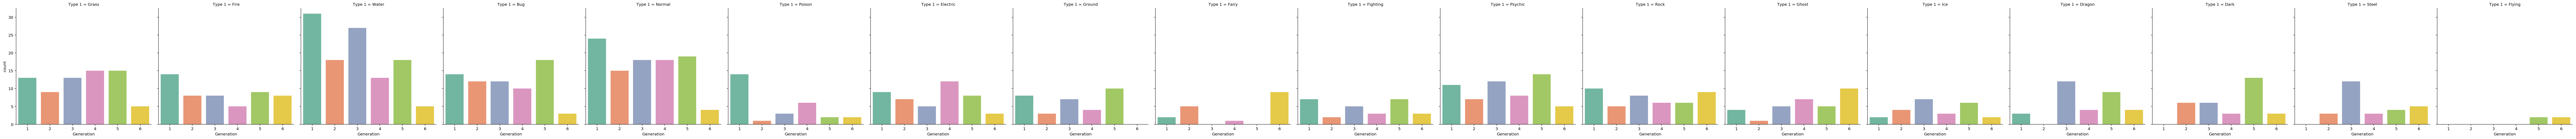

In [52]:
sns.catplot(x="Generation", col="Type 1",data=pokemon, palette="Set2", kind="count")

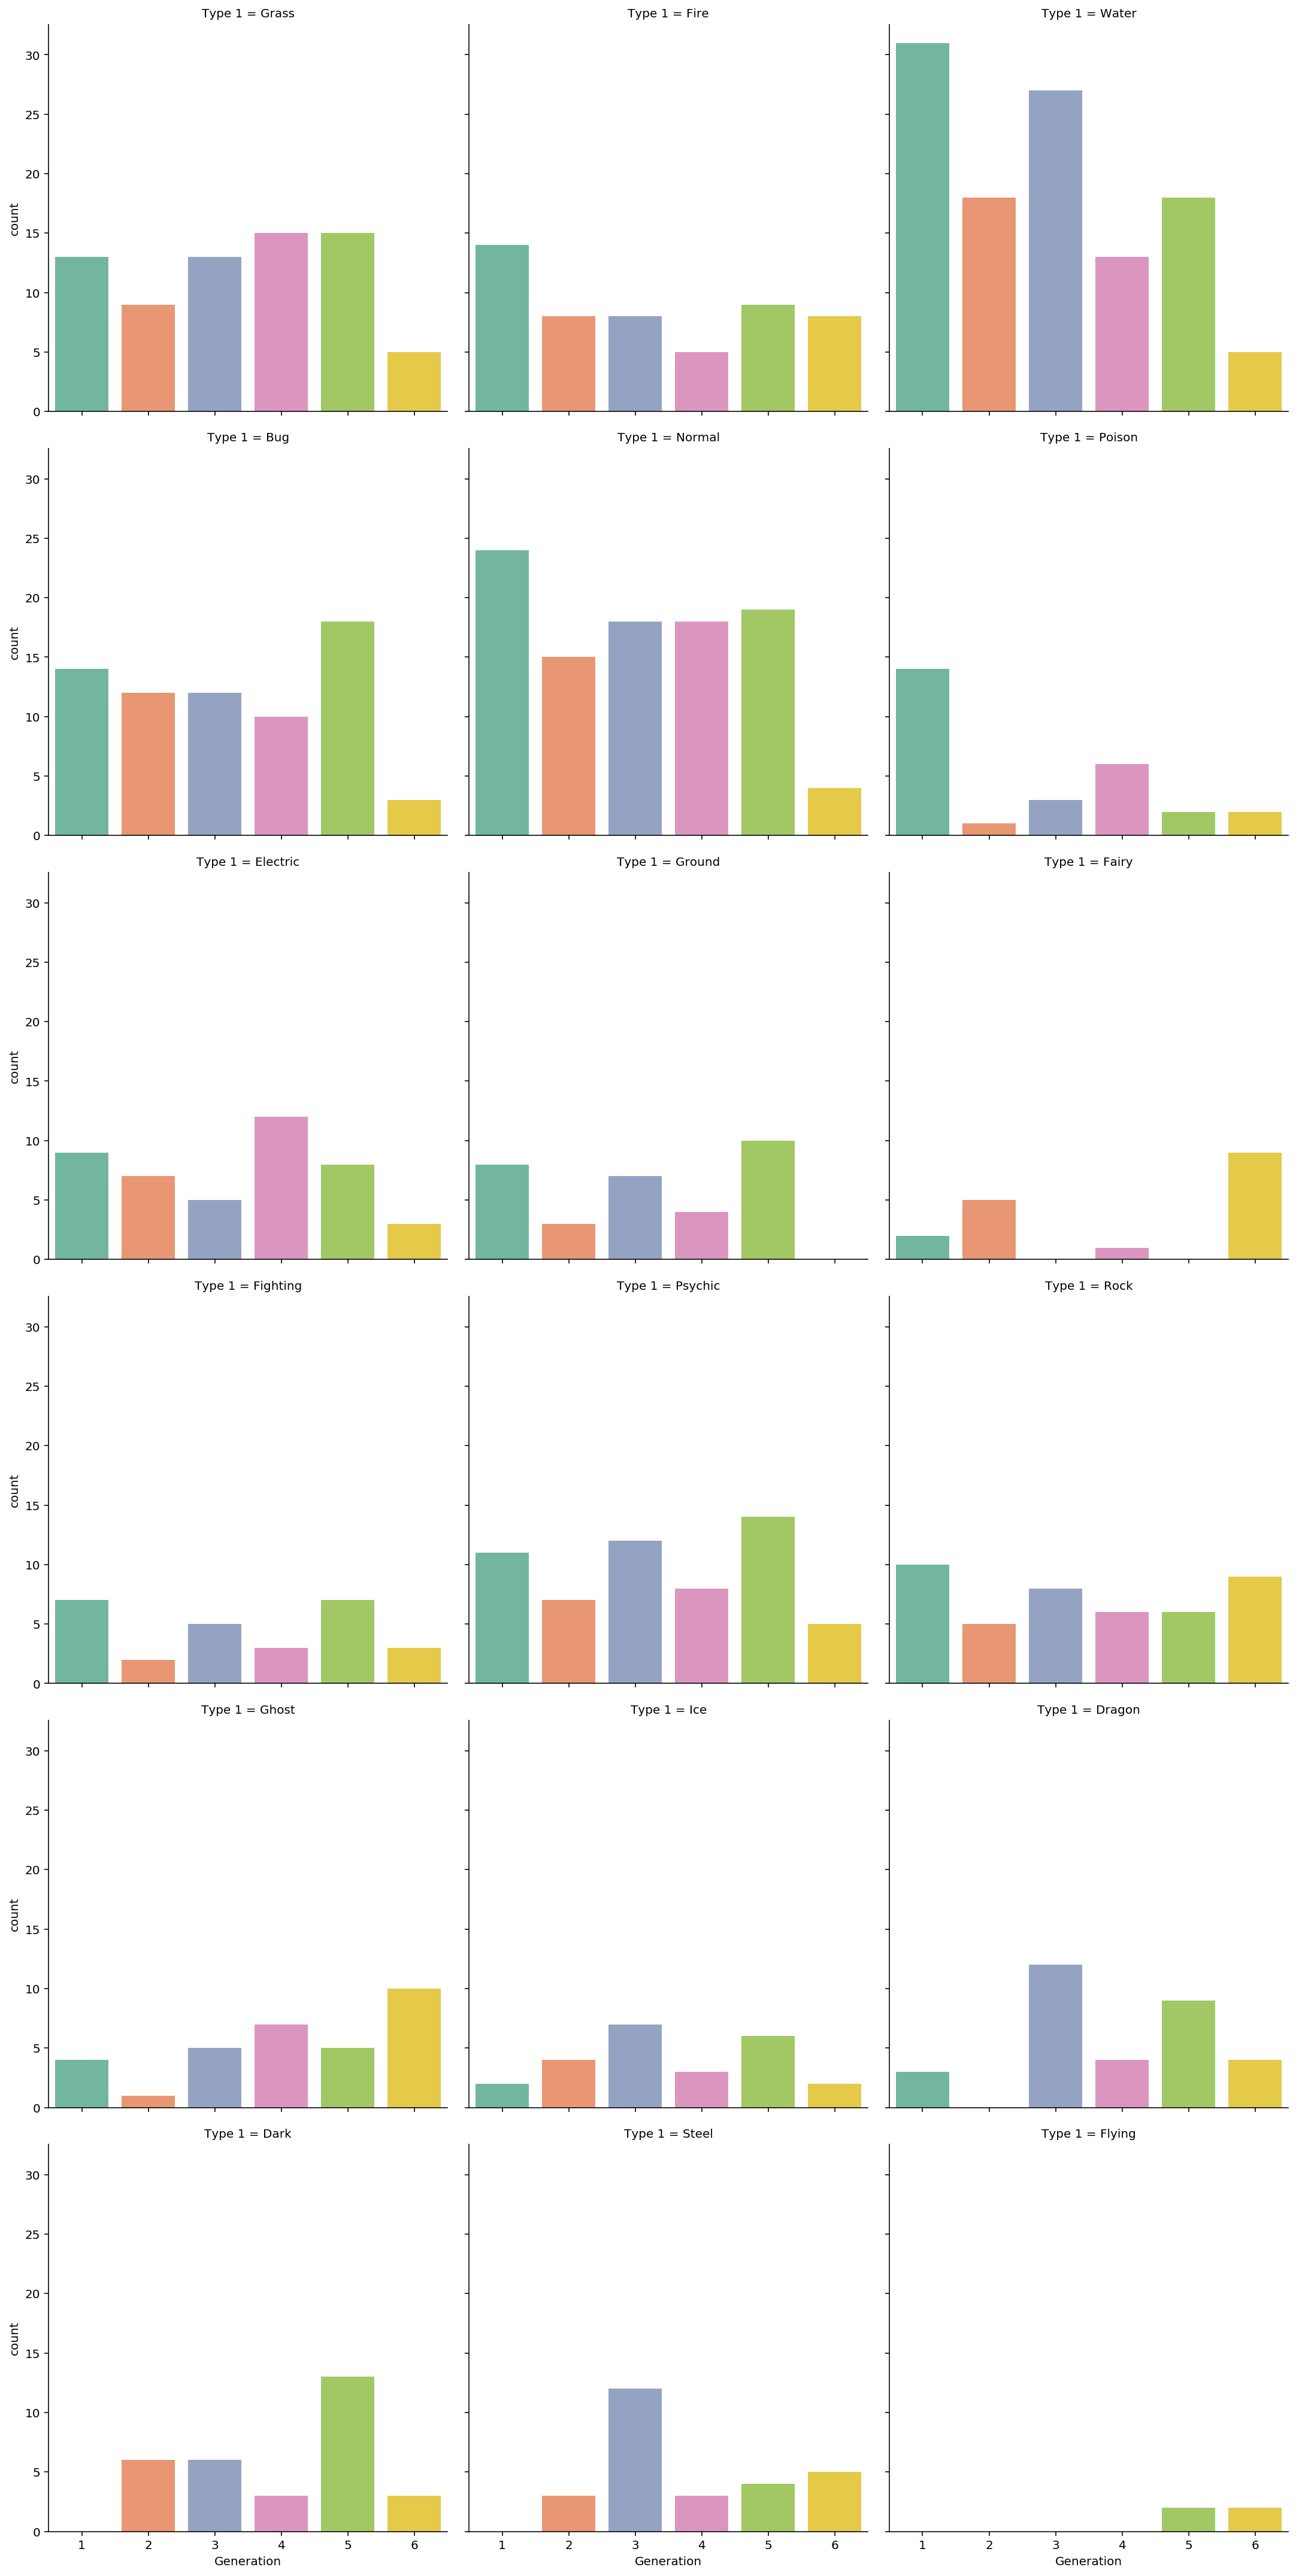

In [53]:
sns.catplot(x="Generation", col="Type 1",data=pokemon, palette="Set2", kind="count", col_wrap=3)

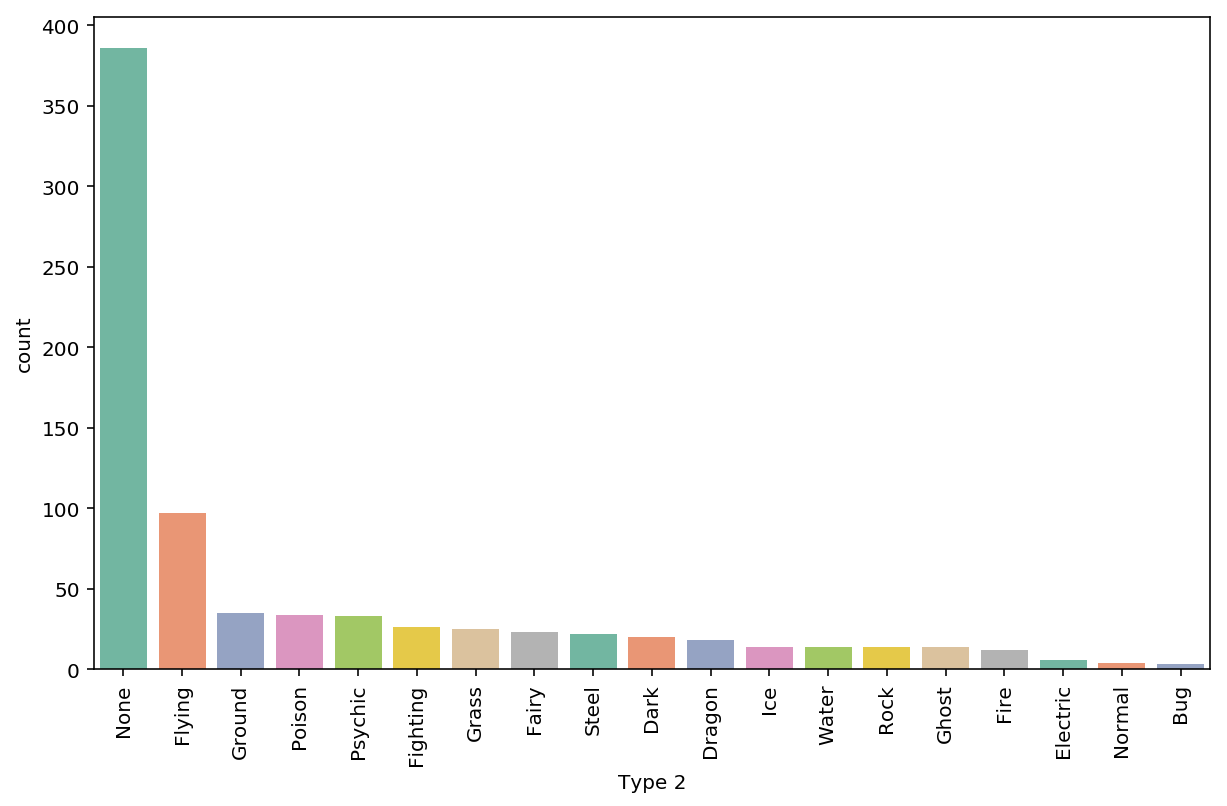

In [59]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.countplot(x="Type 2", data=pokemon, palette="Set2", order=pokemon["Type 2"].value_counts().index) # ordena de mes gran a més petit

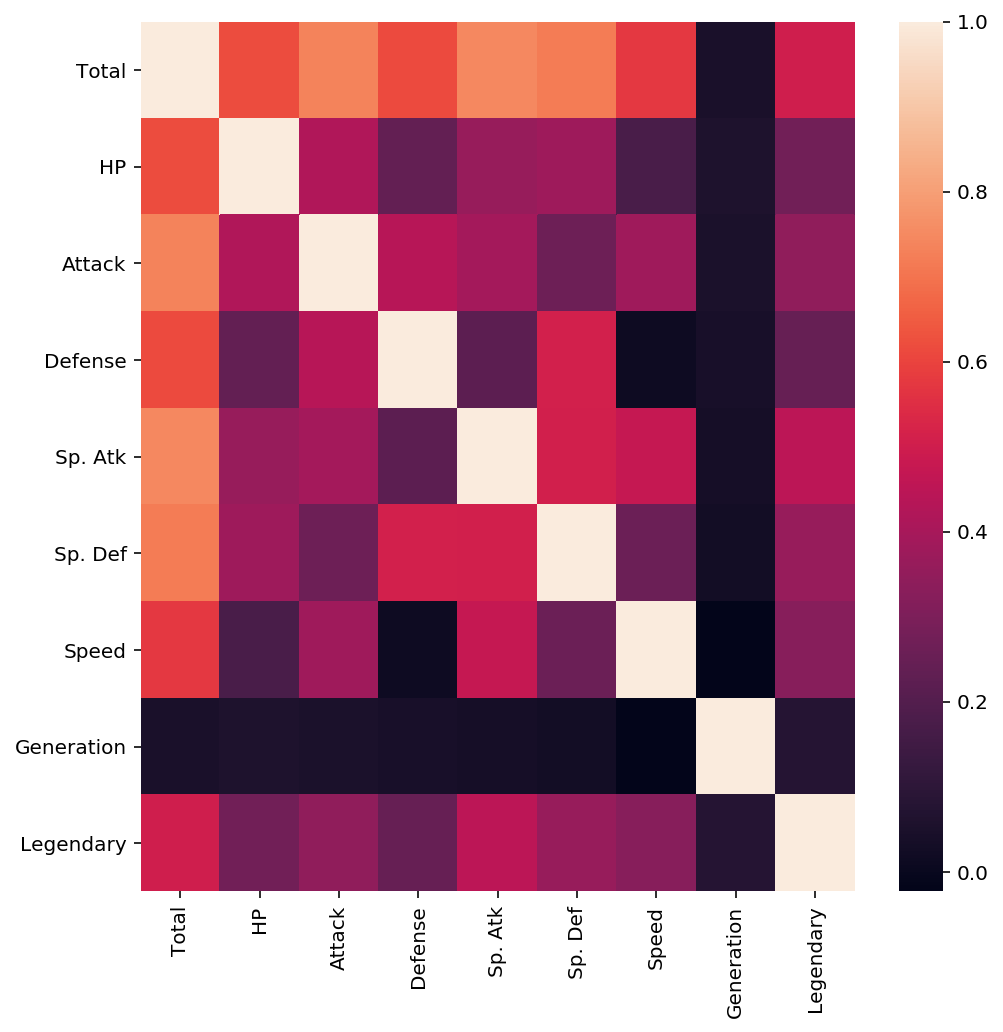

In [60]:
plt.figure(figsize=(8,8))
sns.heatmap(pokemon.corr())

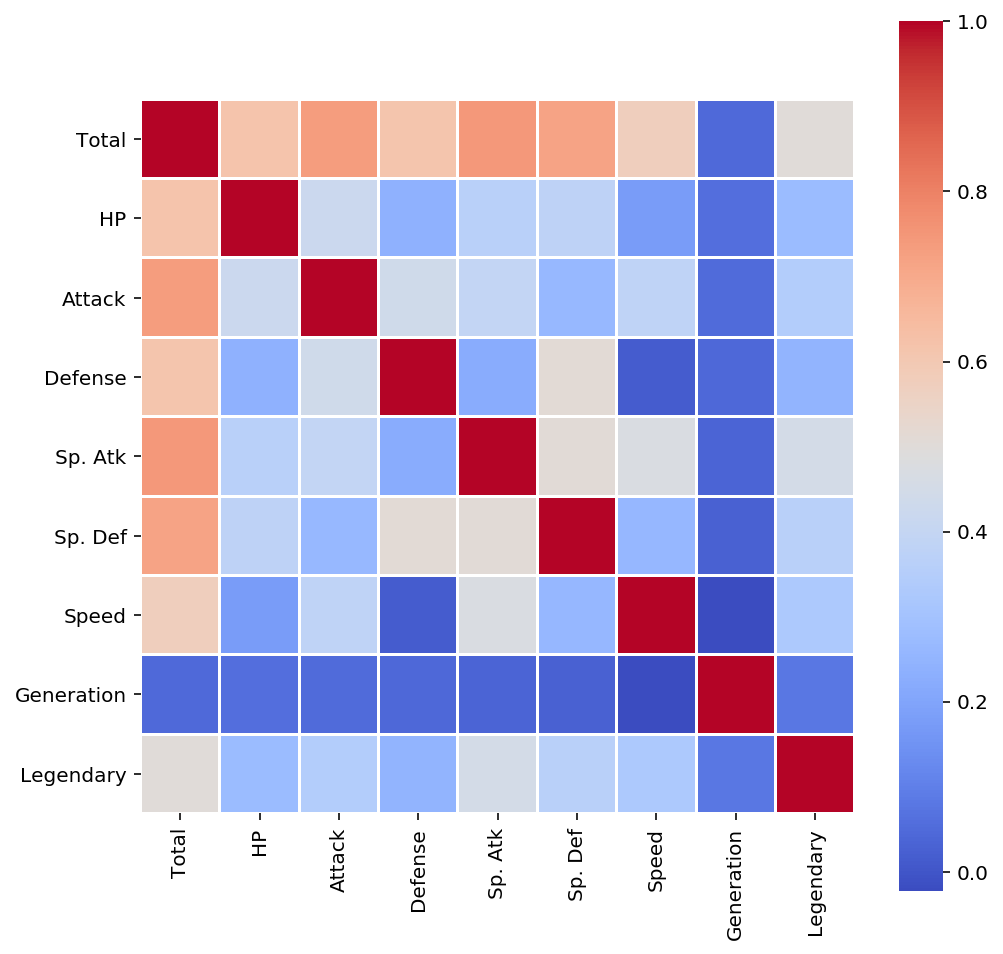

In [67]:
plt.figure(figsize=(8,8))
sns.heatmap(pokemon.corr(), square=True, linewidths=1, cmap="coolwarm")

C:\Users\Usuarioç\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


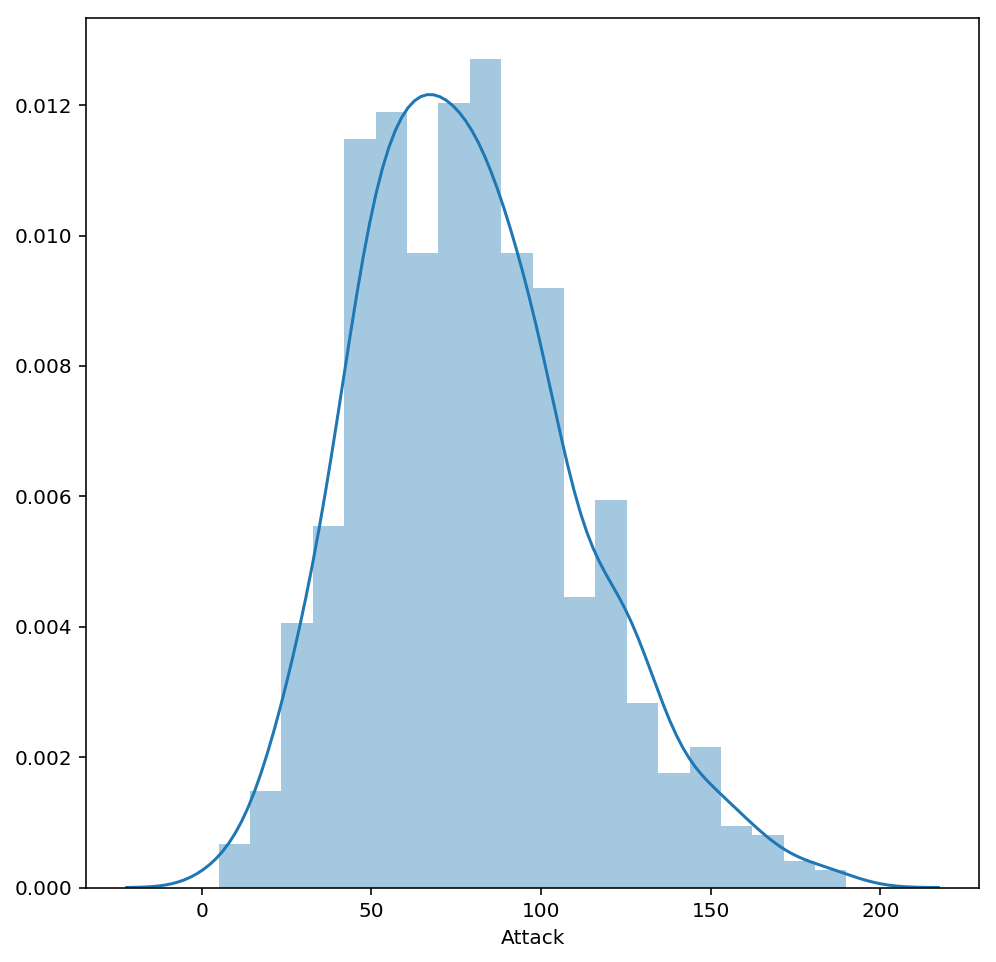

In [68]:
plt.figure(figsize=(8,8))
sns.distplot(pokemon.Attack)

C:\Users\Usuarioç\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

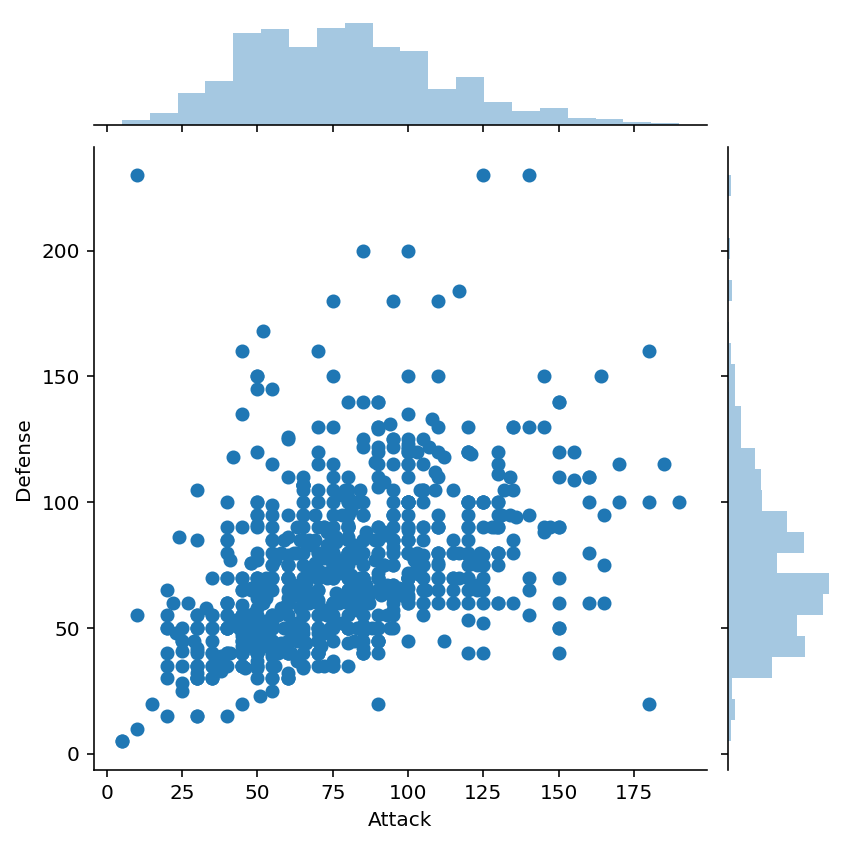

In [69]:
plt.figure(figsize=(8,8))
sns.jointplot(x='Attack', y='Defense', data=pokemon)

In [75]:
pokemon["Attack"].max()

190

In [80]:
pokemon["Defense"].max()

230

In [89]:
pokemon.iloc[190:192]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
176,Togetic,Fairy,Flying,405,55,40,85,80,105,40,2,False
177,Natu,Psychic,Flying,320,40,50,45,70,45,70,2,False


C:\Users\Usuarioç\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

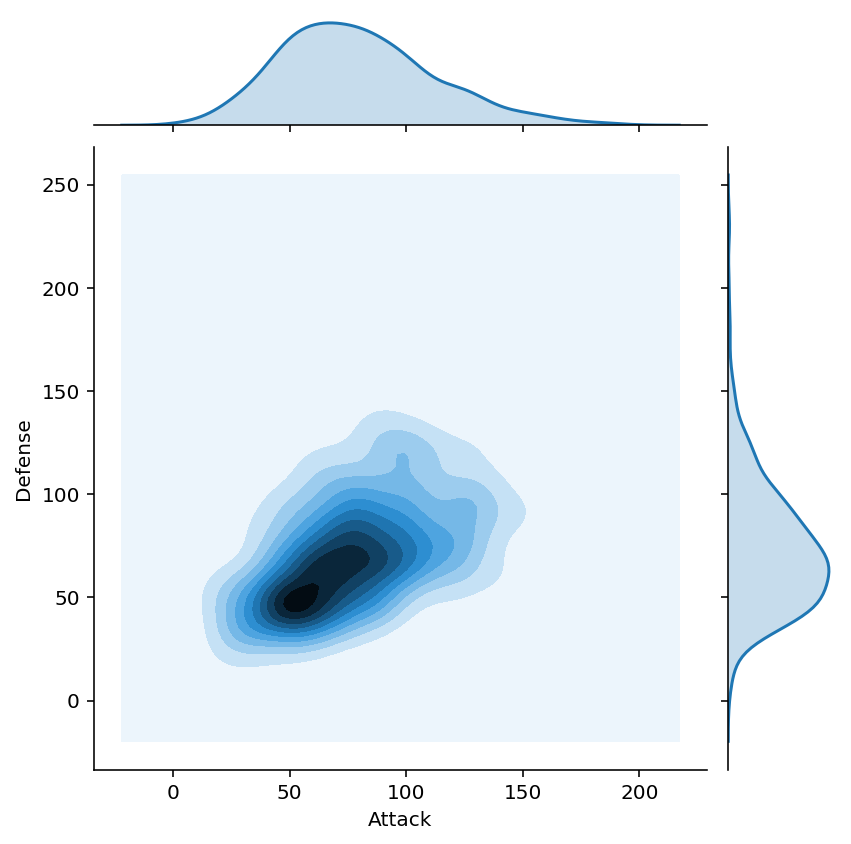

In [92]:
plt.figure(figsize=(8,8))
sns.jointplot(x='Attack', y='Defense', data=pokemon, kind="kde")

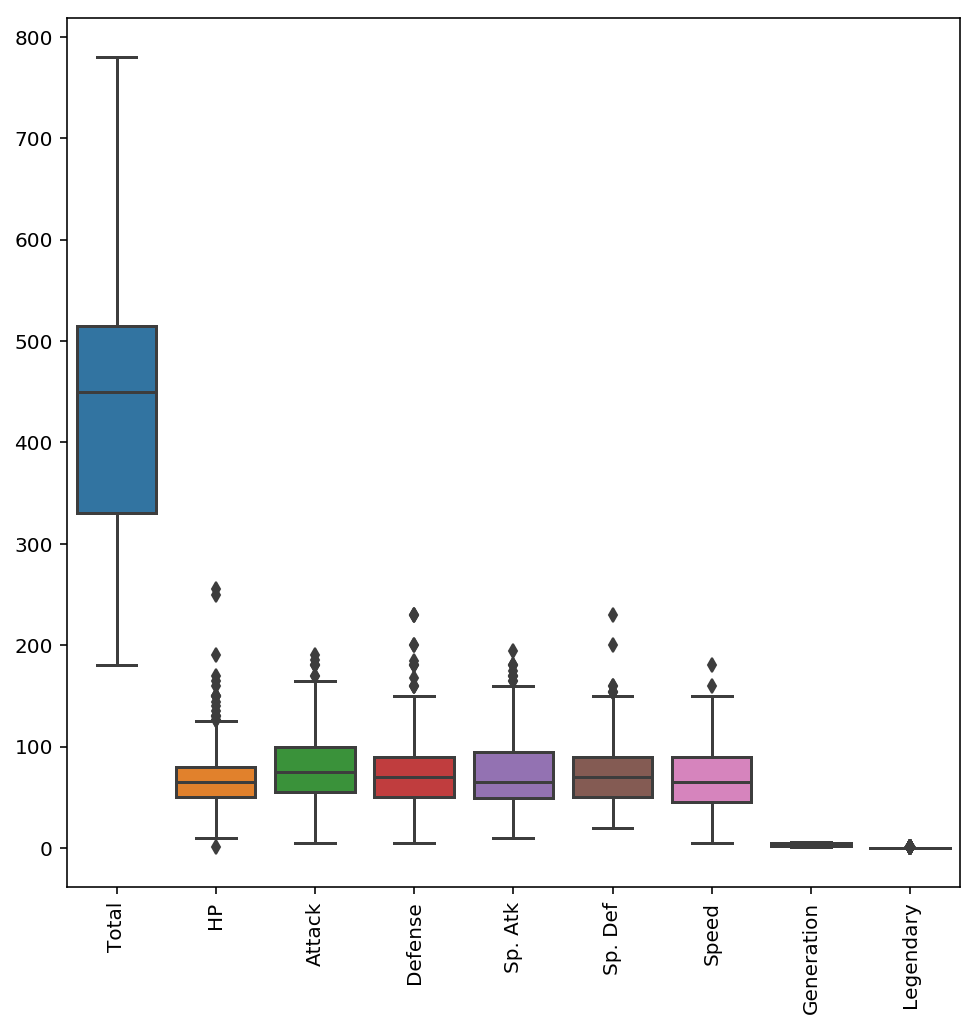

In [94]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.boxplot(data=pokemon)

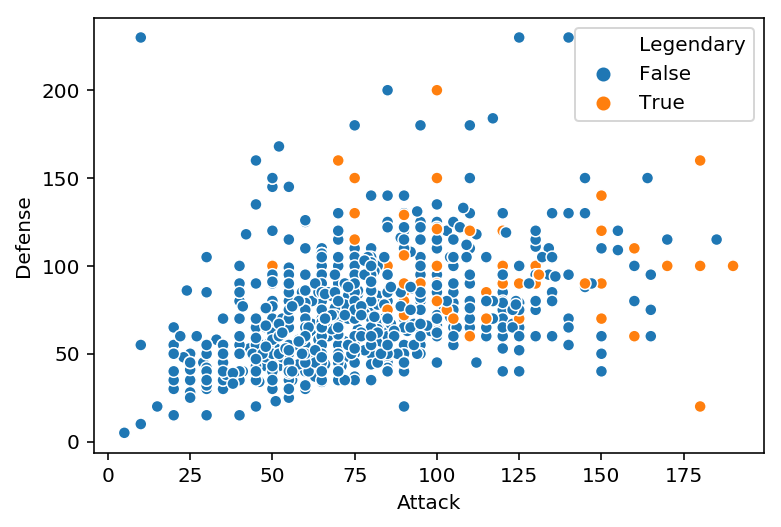

In [95]:
sns.scatterplot(x="Attack", y="Defense", hue="Legendary", data=pokemon)

In [104]:
pokemon.nlargest(10,["Total"])

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
150,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
382,KyogrePrimal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True
248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


C:\Users\Usuarioç\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Usuarioç\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Usuarioç\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Usuarioç\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


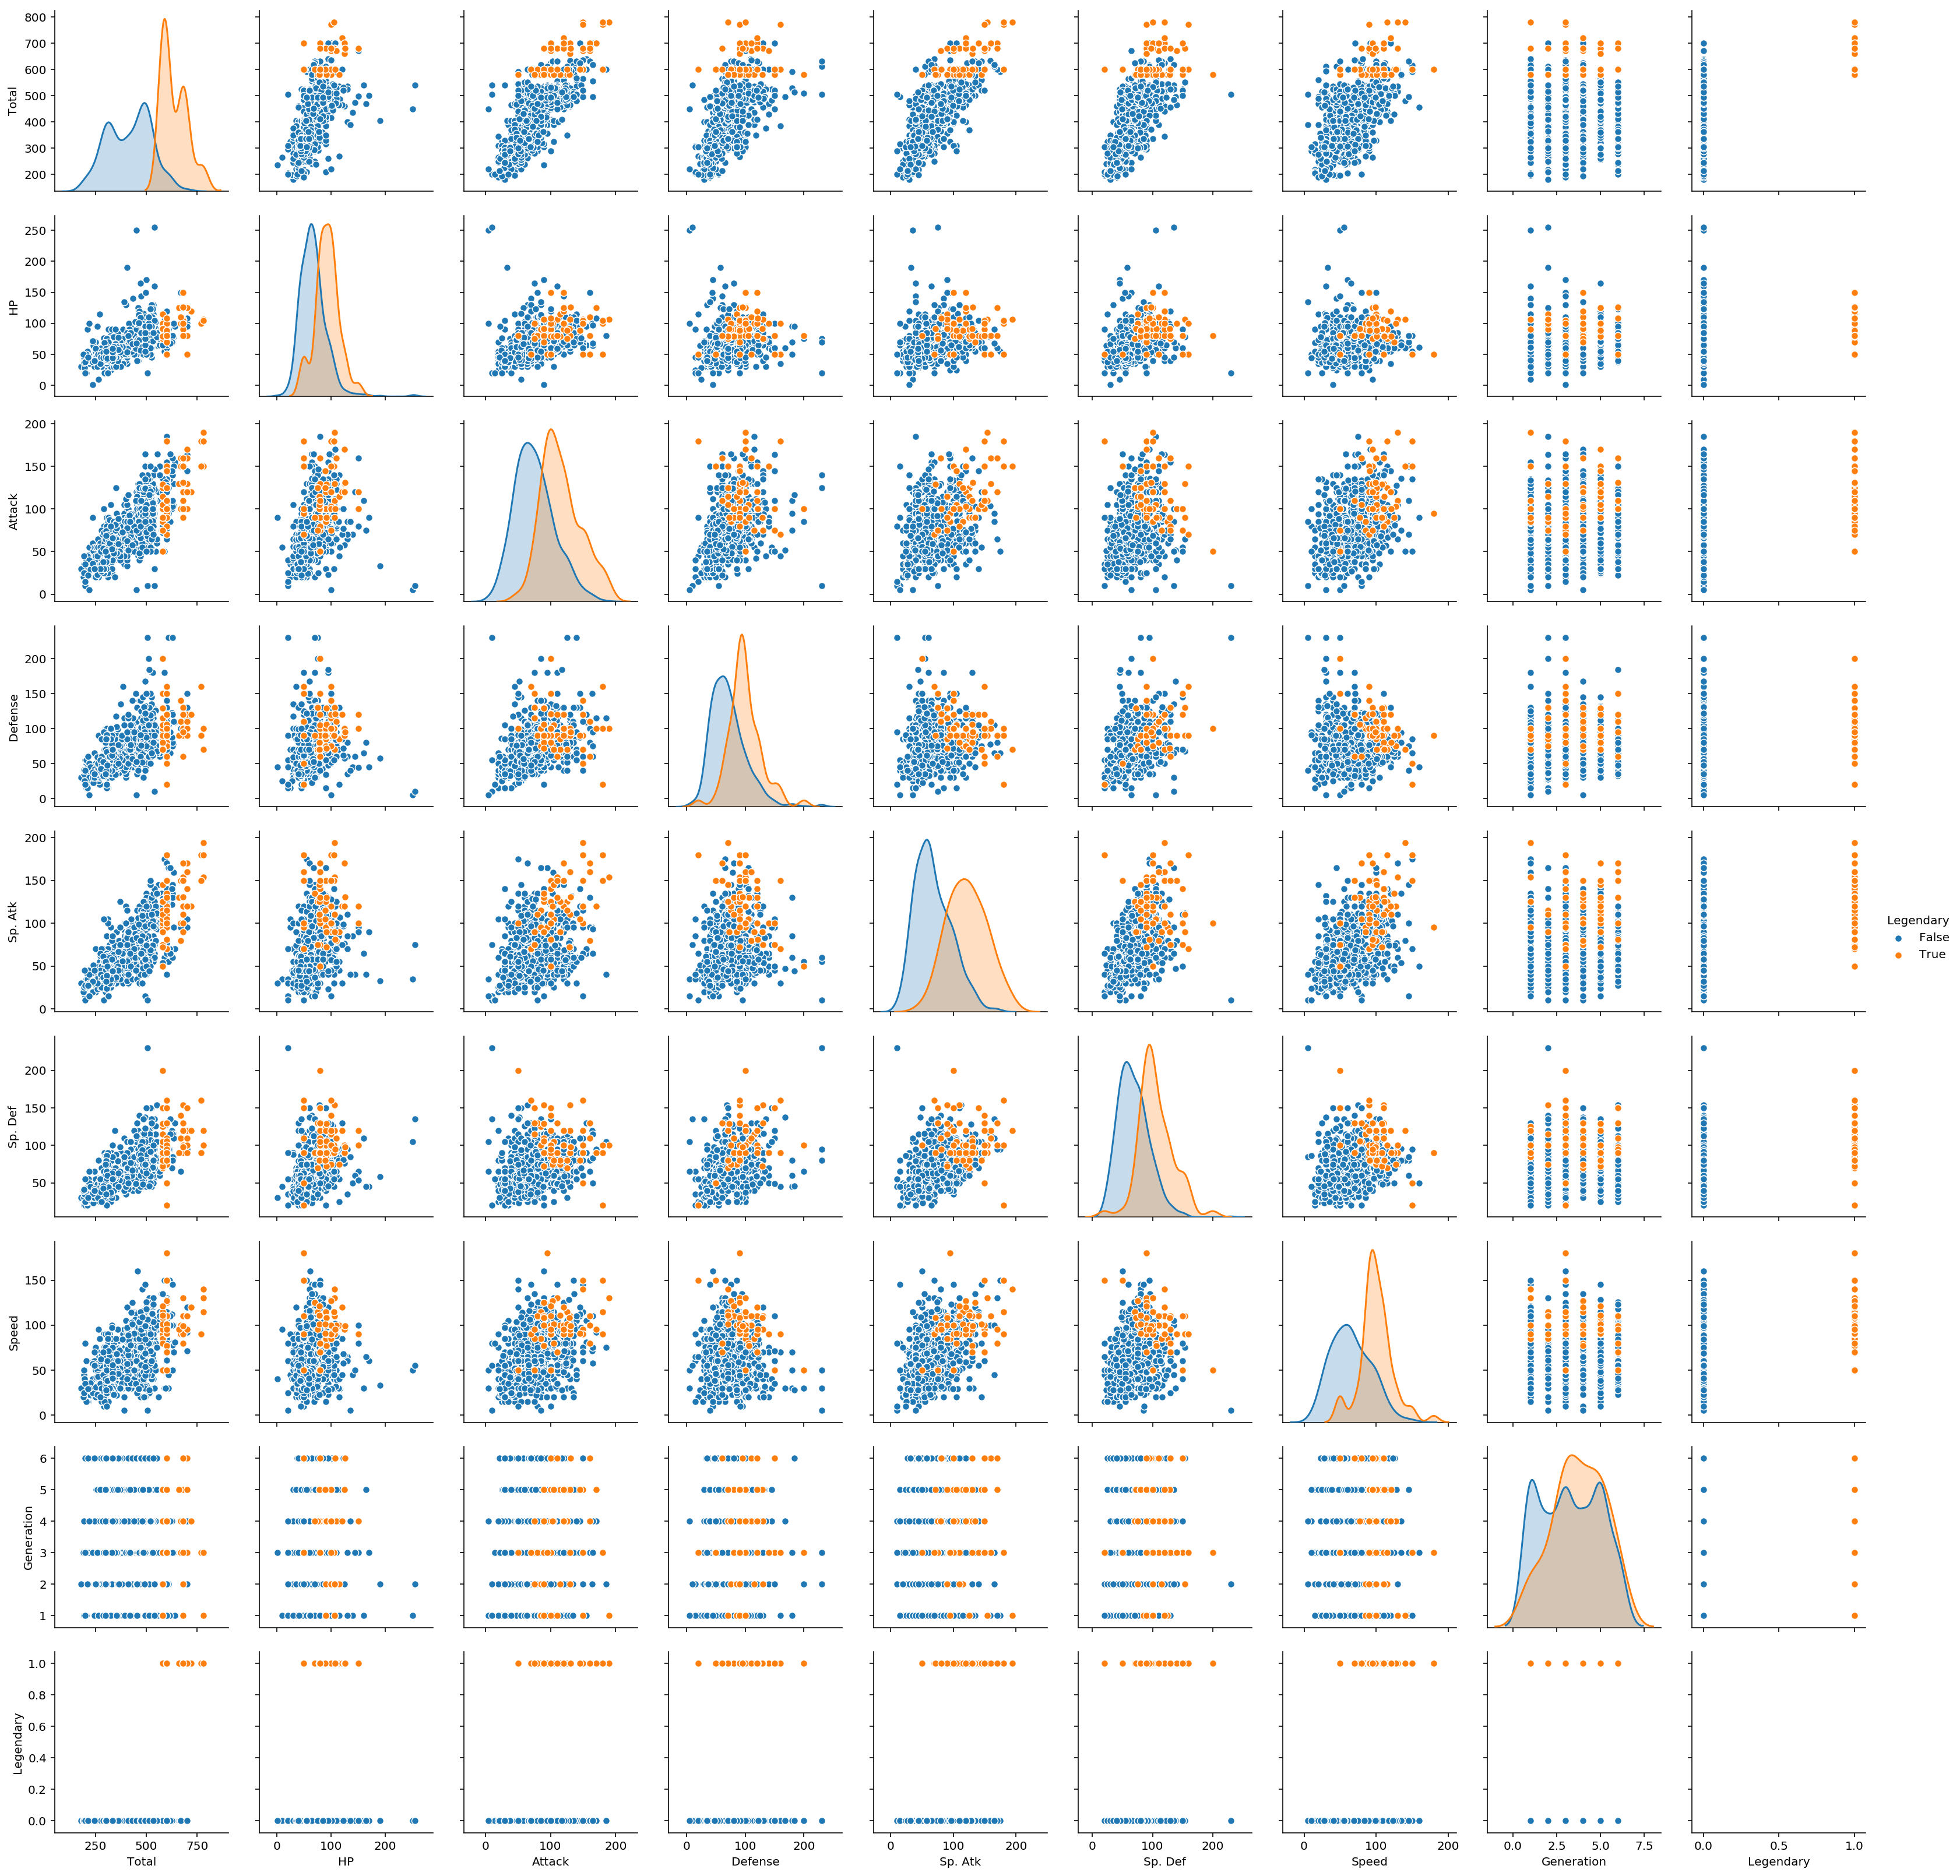

In [102]:
sns.pairplot(pokemon, hue="Legendary")